## Import Libraries

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score
%matplotlib inline
np.random.seed(2)

Using TensorFlow backend.


## Importing Data

In [2]:
data=pd.read_excel('Hira_Final_Excel_30_Features.xlsx')

In [3]:
data.head()

,Unnamed: 0,SwHBa,minHBd,MDEN-13,XLogP,MATS2s,GATS2s,GGI6,SpMax1_Bhs,GATS4m,...,minHssNH,SRW9,GATS3e,ASP-1,R_TpiPCTPC,GATS5c,AATS8m,GATS1c,GATS3s,CLASS
0,0,-0.351249,-0.602163,-0.38591,-0.080868,-0.458866,-0.276488,-0.083801,0.281555,0.689056,...,-0.175906,-1.504694,-0.519184,0.277805,-0.347614,-0.600570,-0.072174,-0.368918,-0.386182,0
1,1,0.267557,-0.664901,-0.38591,-0.278347,-0.145311,-0.158102,-0.239339,-0.329995,0.743703,...,-0.217294,-1.504694,0.056759,0.726497,-0.348569,-0.141784,-0.167602,0.100444,0.161942,0
2,2,0.797947,-0.156930,-0.38591,0.800734,-0.107372,-0.469982,-0.780609,-0.364963,0.430726,...,0.117806,-1.504694,-0.270485,0.557216,-0.272658,1.581178,-0.353213,0.347286,0.110075,0
3,3,0.002126,-0.965972,-0.38591,-0.420579,-0.639170,0.622512,0.296402,0.292371,0.435166,...,-0.415906,0.826836,-0.558183,-0.110332,-0.595717,-0.127133,-0.337717,-0.505372,-0.342719,0
4,4,0.112239,-0.830326,-0.38591,-0.756176,-0.142033,0.295054,-0.320218,0.023826,0.679495,...,-0.326422,-1.504694,-0.653413,0.726497,-0.682845,0.226682,-0.563980,-0.463201,-0.715704,0


In [4]:
data = data.drop('Unnamed: 0' , axis=1)
X=data.iloc[:,data.columns!='CLASS']
y=data.iloc[:,data.columns=='CLASS']
col = X.columns

In [5]:
data.head()

,SwHBa,minHBd,MDEN-13,XLogP,MATS2s,GATS2s,GGI6,SpMax1_Bhs,GATS4m,SpMax3_Bhm,...,minHssNH,SRW9,GATS3e,ASP-1,R_TpiPCTPC,GATS5c,AATS8m,GATS1c,GATS3s,CLASS
0,-0.351249,-0.602163,-0.38591,-0.080868,-0.458866,-0.276488,-0.083801,0.281555,0.689056,0.304063,...,-0.175906,-1.504694,-0.519184,0.277805,-0.347614,-0.600570,-0.072174,-0.368918,-0.386182,0
1,0.267557,-0.664901,-0.38591,-0.278347,-0.145311,-0.158102,-0.239339,-0.329995,0.743703,0.196734,...,-0.217294,-1.504694,0.056759,0.726497,-0.348569,-0.141784,-0.167602,0.100444,0.161942,0
2,0.797947,-0.156930,-0.38591,0.800734,-0.107372,-0.469982,-0.780609,-0.364963,0.430726,0.188879,...,0.117806,-1.504694,-0.270485,0.557216,-0.272658,1.581178,-0.353213,0.347286,0.110075,0
3,0.002126,-0.965972,-0.38591,-0.420579,-0.639170,0.622512,0.296402,0.292371,0.435166,0.409627,...,-0.415906,0.826836,-0.558183,-0.110332,-0.595717,-0.127133,-0.337717,-0.505372,-0.342719,0
4,0.112239,-0.830326,-0.38591,-0.756176,-0.142033,0.295054,-0.320218,0.023826,0.679495,-0.129296,...,-0.326422,-1.504694,-0.653413,0.726497,-0.682845,0.226682,-0.563980,-0.463201,-0.715704,0


In [6]:
X.shape , y.shape

((2548, 30), (2548, 1))

In [7]:
from imblearn.over_sampling import SMOTE
X , y =SMOTE().fit_sample(X,y)

In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
X.shape , y.shape

((4480, 30), (4480, 1))

In [10]:
X = pd.DataFrame(X)
X.columns= col
y = pd.DataFrame(y)

In [11]:
y_ = y.rename(columns={0: "class"})

In [12]:
#PCA to visualize data in 2 dimension

In [13]:
from sklearn.decomposition import PCA as sklearnPCA
np.random.seed(2)
pca = sklearnPCA(n_components=2)

In [14]:
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, y] ,axis = 1)

In [16]:
finalDf = finalDf.rename(columns={0: "target"})

In [17]:
finalDf

,principal component 1,principal component 2,CLASS
0,0.297553,0.091282,0
1,-0.360197,0.233018,0
2,-1.059182,0.733638,0
3,0.537476,-0.071620,0
4,-0.179827,-0.343154,0
5,-0.207171,0.988892,0
6,-0.191504,0.693135,0
7,0.746883,0.373776,0
8,2.483043,0.120301,0
9,0.249652,0.385990,0


KeyError: 'target'

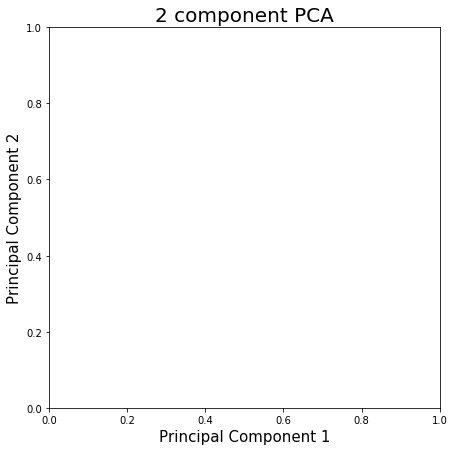

In [18]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0 , 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
mask = (y_['class'] == 0)
class_0 = y_.loc[mask,:]
mask = (y_['class'] == 1)
class_1 = y_.loc[mask,:]

KeyError: 'class'

In [20]:
label = [0 , 1]
data = [len(class_0) , len(class_1)]

In [21]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    fig = plt.figure(figsize = (6,6))
    plt.bar(index,data)
    plt.xlabel('class', fontsize=10)
    plt.ylabel('No of data points', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Data after smote')
    plt.show()

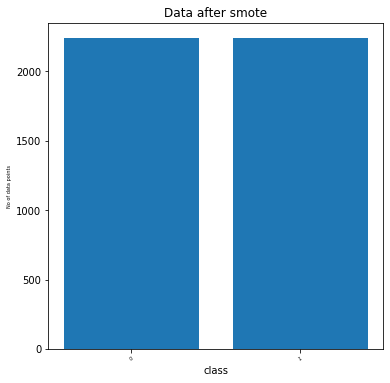

In [22]:
plot_bar_x()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [24]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3136, 30), (1344, 30), (3136, 1), (1344, 1))

In [25]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [26]:
y_train.shape , y_test.shape

((3136,), (1344,))

In [27]:
y_train = y_train.reshape(3136,1)
y_test = y_test.reshape(1344,1)

In [28]:
params = {
    'max_depth': 18,
    'objective': 'binary:logistic',  # error evaluation for multiclass training
    'n_estimators':20,                # Number of classes 
    'tree_method':'hist',
    'gamma':0.0001,
    'reg_alpha':0.05,
    'learning_rate':0.1
    
}

In [ ]:
xg_clf = xgb.XGBClassifier(**params)
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_clf.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

In [ ]:
pred = xg_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, pred))

In [ ]:
roc_auc_score(y_test, pred)

In [ ]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Train and Test Accuracy
from sklearn.metrics import accuracy_score
print ("Test Accuracy  :: ", accuracy_score(y_test, pred ))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix=confusion_matrix(y_test,pred.round())
plot_confusion_matrix(cnf_matrix , classes=[0,1])
plt.show()

In [ ]:
import seaborn as sns
sensitivity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity)

sns.heatmap(cnf_matrix, center=True)
plt.show()

In [ ]:
PPV = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print('Positive Predictive Value : ', PPV )

In [ ]:
NPV = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
print('Negative Predictive Value : ', NPV )

In [ ]:
FPR = cnf_matrix[1,0]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('False Positive Rate : ', FPR )

In [ ]:
FNR = cnf_matrix[0,1]/(cnf_matrix[0,1]+cnf_matrix[0,0])
print('False Negative Rate : ', FNR )

In [ ]:
FDR = cnf_matrix[1,0]/(cnf_matrix[1,0]+cnf_matrix[0,0])
print('False Discovery Rate : ', FDR )

In [ ]:
FOR = cnf_matrix[0,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
print('False Omission Rate : ', FOR )

In [ ]:
acc= (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])
print('Accuracy : ', acc )

In [ ]:
Recall = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
fs= 2*((PPV*Recall)/(PPV+Recall))
print('F1 Score : ',fs)

In [ ]:
PLR = (Recall/FPR)
print('Positive Likelihood Ratio : ', PLR )

In [ ]:
sp= (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
NLR=(FNR/sp)
print('Negative Likelihood Ratio : ', NLR )

In [ ]:
DOR = (PLR/NLR)
print('Diagnostic Odds Ratio : ', DOR )

In [ ]:
pre = (cnf_matrix[0,0]+cnf_matrix[0,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[0,1])
print ('Prevalence : ', pre)

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred.round())
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
# retrieve performance metrics
results = xg_clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

In [ ]:
predictions = [round(value) for value in pred]

In [ ]:
# plot log loss
fig, ax = pyplot.subplots(figsize=(9,9))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
 
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
 

In [ ]:
 # plot classification error
fig, ax = pyplot.subplots(figsize=(9,9))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
    
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()